# Part II - (Prosper Loan Presentation)
## by (Hikmat)




## Investigation Overview
The Prosper Loan dataset contains information about loans facilitated by Prosper, an online peer-to-peer lending marketplace. Some of the key insights from the dataset are:

Borrower Annual Percentage Rate (APR) has a negative correlation with the Prosper Score, indicating that borrowers with a higher Prosper Score generally have lower APRs.
There is a positive correlation between the Loan Original Amount and the Borrower APR, indicating that larger loans tend to have higher interest rates.
EmploymentStatus has an impact on the Prosper Rating of the borrower, with employed and full-time workers having higher Prosper Ratings on average than other employment types.
The majority of loans in the dataset were for debt consolidation, followed by home improvement and business purposes.
Loans with longer terms tend to have higher interest rates, and loans with shorter terms tend to have lower interest rates.


## Dataset Overview

> This is a loan dataset from prosper, This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I would only concentrate on few variables and not all the 81 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## (Visualization 1)
What is the Frequency of the Loan Status?

The frequency of the loan status as seen that most people are still currently paying their loan,while only like 3800 people have completed theirs and up to 1400 people were charged off with only few defaulting and less than 500 past due date.


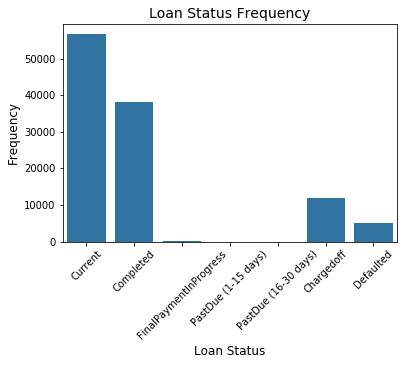

In [3]:
# create a function
def set_plot_labels(title, x_label, y_label):
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    # Create a new column for the loan status with the desired order
df['LoanStatusOrder'] = pd.Categorical(df['LoanStatus'], categories=['Current', 'Completed', 'FinalPaymentInProgress', 'PastDue (1-15 days)', 'PastDue (16-30 days)', 'Chargedoff', 'Defaulted'], ordered=True)
base_color = sns.color_palette()[0]
# Plot the frequency of each LoanStatus using a bar chart
sns.countplot(data=df, x='LoanStatusOrder', color=base_color)

# set the title and labels for the chart
set_plot_labels("Loan Status Frequency", "Loan Status", "Frequency")

# Rotate the x-tick labels to make them readable
plt.xticks(rotation=45)
# Display the chart
plt.show();


## (Visualization 2)

> What is the distribution of the lenderyield?

The lenderyield distribution is non uniform


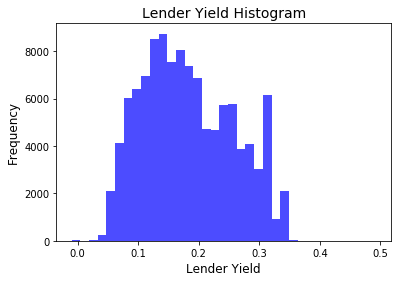

In [4]:
# create a histogram plot using LenderYield
plt.hist(data= df, x ='LenderYield',bins = 35,color = 'blue',alpha = 0.7)
set_plot_labels("Lender Yield Histogram", "Lender Yield", "Frequency")
plt.show();

## (Visualization 3)
What is the distribution of the loan Amount by prosper Score?
Those with a prosper score of 2.0 have a high density and those with propser score of 11.0 have many more outliers

In [ ]:
# Create the violin plot
sns.set(style="whitegrid")
base_color = sns.color_palette()[2]
# Create a list of the ProsperRating values in the desired order
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sns.violinplot(x="ProsperRating (Alpha)", y="BorrowerAPR", data=df,color = base_color,inner = None, order = rating_order)
plt.xticks(rotation= 15)
# Show the plot
plt.title('ProsperRating by BorrowerAPR')
plt.show();

## (Visualization 4)
What is the relationship between BorrowerAPR and BorrowerRate?

From the box plot above, we can see that the minimum borrowerrate is 0.0 while that of borrowerapr is 0.1 and the Q1 of borrowerrate is 0.13 and that of borrowerapr is 0.16. In conclusion borrower apr is slightly higher than borrowerrate.

In [ ]:
# create the boxplot
base_color = sns.color_palette()[0]
sns.boxplot(data=df[['BorrowerAPR', 'BorrowerRate']],color = base_color)
plt.title('BorrowerRate and BorrowerAPR')
plt.show();

## (Visualization 5)
What is the relationship between Average Credit Score and Prosper Score?

From this size encoding chart we can see that there is a strong correlation between credit score range lower and credit score range upper ... The size of the circle increases as the value increases.

In [ ]:
# Filter the data to only include complete loans with available credit information
complete_loans = df[(df['LoanStatus'] == 'Completed') & (df['CreditScoreRangeLower'].notna()) & (df['CreditScoreRangeUpper'].notna())]

# Calculate the average credit score for each Prosper score rating
grouped = complete_loans.groupby('ProsperScore').agg({'CreditScoreRangeLower': 'mean', 'CreditScoreRangeUpper': 'mean'})

# Create a scatter plot with size encoding
plt.scatter(grouped['CreditScoreRangeLower'], grouped['CreditScoreRangeUpper'], s=grouped.index*10, alpha=0.5)

# Add axis labels and title
set_plot_labels('Average Credit Score by Prosper Score Rating','Credit Score Range Lower','Credit Score Range Upper')
plt.show();


### Generate Slideshow

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt